In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from skimage.transform import resize, rescale

# 12. Multiscale Analysis

## 12.1 Pyramidal decomposition and reconstruction
### 12.1.1 Decomposition

Text(0.5, 1.0, 'cerveau.png')

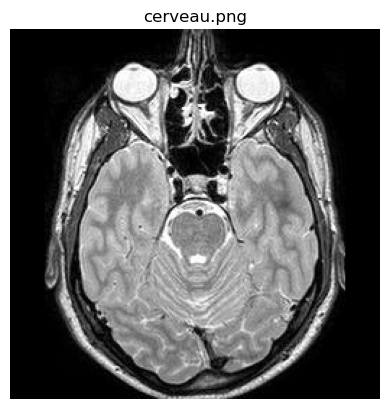

In [2]:
cerveau = iio.imread('images/cerveau.jpg')

plt.imshow(cerveau)
plt.axis('off')
plt.title('cerveau.png')

In [3]:
def LaplacianPyramidDecomposition(Image, levels, interp='bilinear'):
    """
    Laplacian / Gaussian Pyramid
    The last image of the laplacian pyramid allows a full reconstruction of the original image.
    Image: original image, float32
    levels: number of levels of decomposition
    interp: interpolation mode for downsizing the image

    returns: pyrL, pyrG: Laplacian and Gaussian pyramids, respectively, as a list of arrays
    """

    pyrL = []
    pyrG = []

    sigma = 3.
    for l in range(levels):
        prevImage = Image.copy()
        g = ndimage.gaussian_filter(Image, sigma)       # Filter

        Image = rescale (g, .5)
        primeImage= resize (Image, prevImage.shape)     # Subsampling

        pyrL.append(prevImage - primeImage)             # Details
        pyrG.append(prevImage)

    pyrL.append(Image)
    pyrG.append(Image)
    return pyrL, pyrG

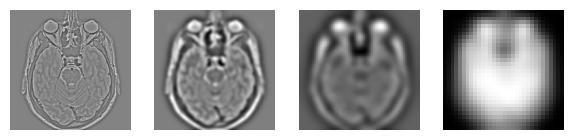

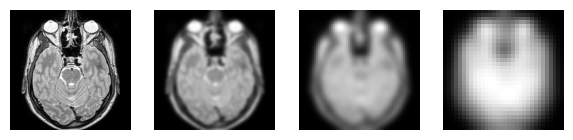

In [4]:
def displayPyr(pyr, filename=None):
    """
    Display all images of pyramid and stores them in files
    pyr: list of images (np arrays)
    filename: generic name for saving images, in a file: .png
    """
    plt.figure(figsize=(9,9))
    for counter, im in enumerate(pyr):
        plt.subplot(3, 5, counter + 1)
        plt.axis('off')
        plt.imshow(im/np.max(im), cmap='gray')


I = cerveau[:, :, 0]    # grayscale image
I = I.astype('float32')
pyrL, pyrG = LaplacianPyramidDecomposition(I, 3)

displayPyr(pyrL, 'laplacian')
displayPyr(pyrG, 'gaussian')

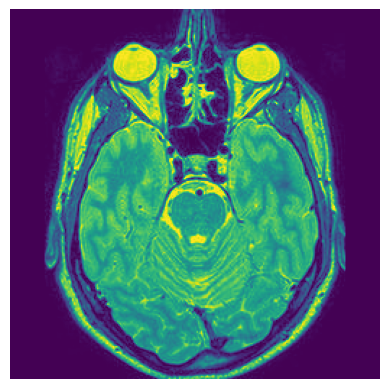

In [5]:
def LaplacianPyramidReconstruction(pyr, interp='bilinear'):
    """
    Reconstruction of the Laplacian pyramid, starting from the last image
    pyr: pyramid of images (list of arrays)
    interp: interpolation mode, for upsizing the image
    returns: Image, reconstructed image
    """

    Image = pyr[-1]
    for i in range(len(pyr)-2, -1, -1):
        Image = pyr[i] + resize (Image, pyr[ i ]. shape)    # oversampling + adding details

    return Image

R = LaplacianPyramidReconstruction(pyrL)
plt.imshow(R.astype('uint8'))
plt.axis('off')
plt.show()